In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading train data
train_data = pd.read_csv(r"C:\Users\sheetal\Desktop\Assignments\Logistic Regression\Logistic Regression\Titanic_train.csv")
test_data = pd.read_csv(r"C:\Users\sheetal\Desktop\Assignments\Logistic Regression\Logistic Regression\Titanic_test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data['Fare'].max()

512.3292

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.shape

(891, 12)

In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test_data.shape

(418, 11)

Data preprocessing

In [12]:
#checking null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#cabin column -- 687/891*100
#there are total 891 rows on which there are 687 null values of cabin that is more than 20% so drop that column
#drop the cabin column
train_data.drop(columns='Cabin',axis=1,inplace =True)

In [14]:
#age column -- 177/891*100 less than 20%
#replace the missing with mean value
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [15]:
#embarked column -- 2/891*100 less than 20%
#categorical - replace the missing with mode value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

In [16]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
#checking values for test data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
#cabin column -- 327/418*100
#there are total 418 rows on which there are 327 null values of cabin that is more than 20% so drop that column
#drop the cabin column
test_data.drop(columns='Cabin',axis=1,inplace=True)


In [19]:
#age column -- 86/418*100 is 20%
#replace the missing with mean value
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [20]:
#fare column -- only one row is missed fill with mean values
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [21]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data explorations

In [22]:
train_data['Survived'].value_counts() #here 0 - not survived and 1 - survived

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

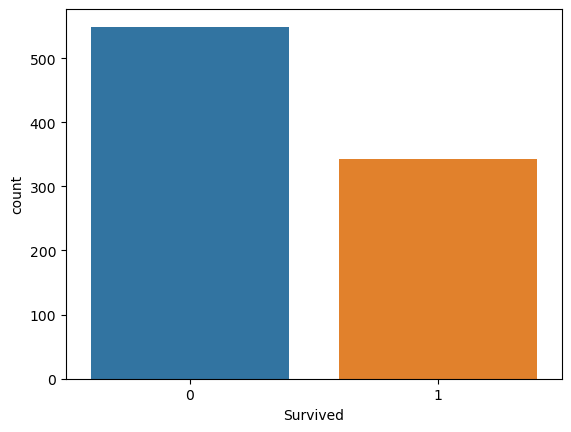

In [23]:
sns.countplot(x='Survived',data=train_data)

<Axes: xlabel='Sex', ylabel='count'>

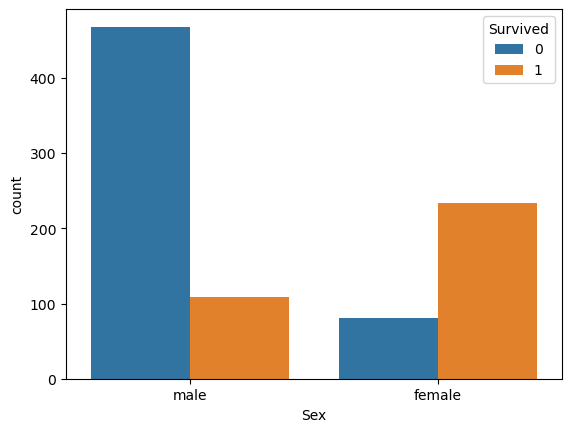

In [24]:
#number of survivors Genderwise
sns.countplot(x='Sex',hue='Survived',data=train_data)

In [25]:
#here more females are saved

<Axes: xlabel='Pclass', ylabel='count'>

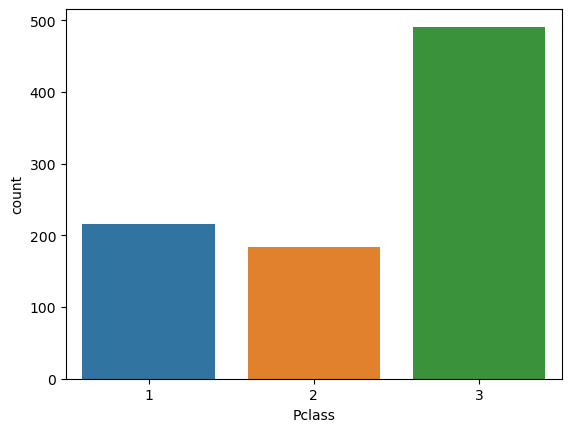

In [26]:
sns.countplot(x='Pclass',data=train_data)

<Axes: xlabel='Pclass', ylabel='count'>

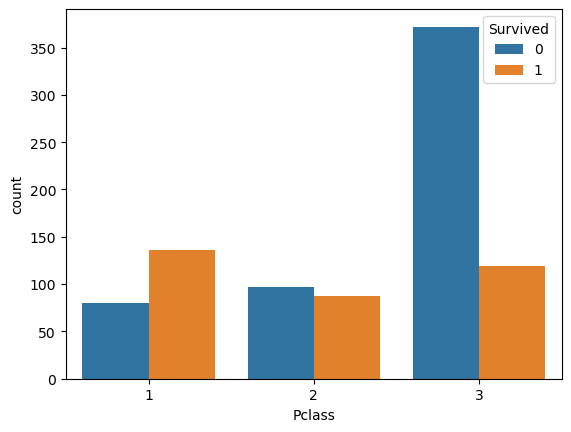

In [27]:
sns.countplot(x='Pclass',hue='Survived',data=train_data)

In [28]:
#more people are saved in first class

<Axes: xlabel='Embarked', ylabel='count'>

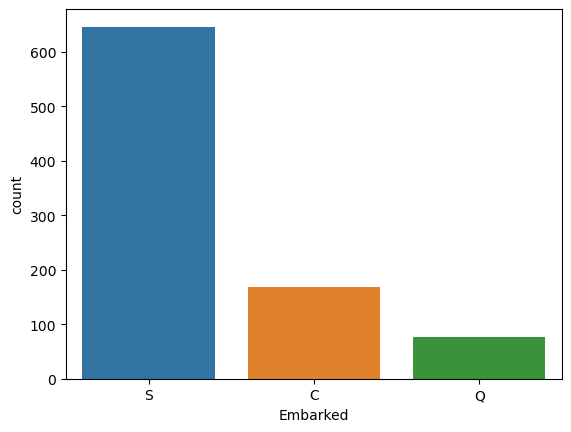

In [29]:
sns.countplot(x='Embarked',data=train_data)

<Axes: xlabel='Embarked', ylabel='count'>

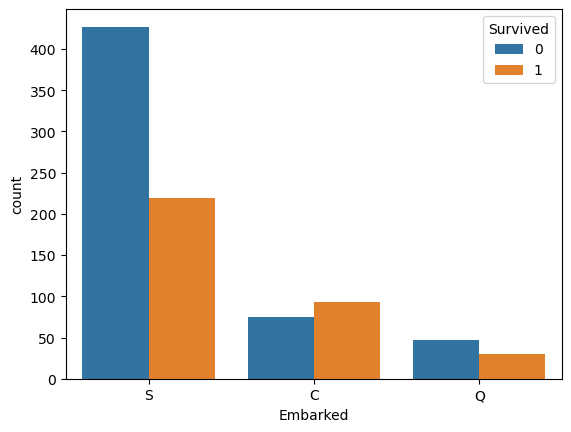

In [30]:
sns.countplot(x='Embarked',hue='Survived',data=train_data)

In [31]:
#S - Southampton
#Q - Queenstown
#C - Cherbourg

In [32]:
#here more peoples Embark from Cherbourg are saved

Data Preprocessing

In [33]:
object_list = ['Sex','Embarked'] 

In [34]:
#for train data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in object_list:
    train_data[x] = le.fit_transform(train_data[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature: ',x)
    print('Mapping: ',le_name_mapping)

Feature:  Sex
Mapping:  {'female': 0, 'male': 1}
Feature:  Embarked
Mapping:  {'C': 0, 'Q': 1, 'S': 2}


In [35]:
#for test data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in object_list:
    test_data[x] = le.fit_transform(test_data[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature: ',x)
    print('Mapping: ',le_name_mapping)

Feature:  Sex
Mapping:  {'female': 0, 'male': 1}
Feature:  Embarked
Mapping:  {'C': 0, 'Q': 1, 'S': 2}


Model Building

In [36]:
#feature selecting
x = train_data.drop(columns=['Survived','PassengerId','Name','Ticket'] ,axis=1)
y = train_data['Survived']

In [ ]:
#test data
test_data.drop(columns=['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
test_scaled = scaler.transform(test_data)

In [ ]:
test_df = pd.concat([x, test_data], ignore_index=True)

In [38]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [39]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [40]:
#split data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)

(712,)
(179,)


In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [43]:
#train the model
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
#predict the model
y_pred = model.predict(x_test)

Model Evaluation

In [45]:
#evaluation on testing data
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[90 15]
 [19 55]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy of the model:  0.8100558659217877


In [46]:
#here accuracy = 81.005%

In [ ]:
#calculating ROC_AUC score

In [72]:
import numpy as np
from sklearn .metrics import roc_curve,roc_auc_score

y_probs = model.predict_proba(x_test)[:, 1]
auc = np.round(roc_auc_score(y_test, y_probs), 3)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.881


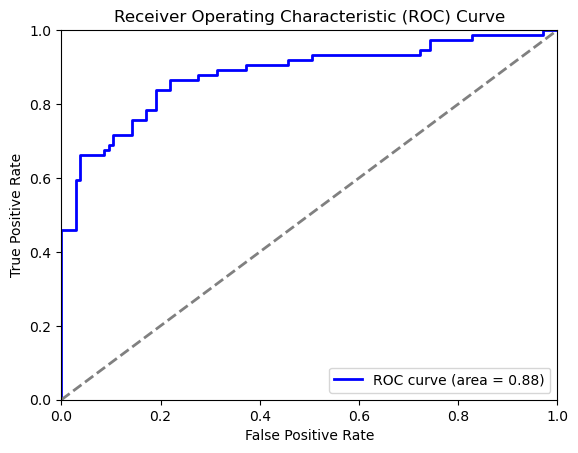

In [73]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
#test data
test_data.drop(columns=['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [48]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [49]:
#standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
test_scaled = scaler.transform(test_data)

In [76]:
test_df = pd.concat([x_test, test_data], ignore_index=True)

In [78]:
#here predict the test data
pred1 = model.predict(test_df)

In [51]:
# Display the predictions
print("Predictions on new data:")
print(pred)

Predictions on new data:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
